In [2]:
# Step 1: Import required packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn as sns

In [3]:
# Step 2: Import data set
fb = pd.read_excel('FB.xlsx')

In [4]:
#Standardise
X_std = StandardScaler().fit_transform(fb)

In [5]:
#Compute covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00014186e+00 -7.76943901e-02  2.06324599e-01  6.17249615e-02
  -8.12258760e-02 -3.30510186e-04  6.03467172e-03  8.81245313e-02
   8.81051025e-02  4.93946367e-02  3.39366193e-02 -6.41064547e-02
   1.26064017e-01]
 [-7.76943901e-02  1.00014186e+00  1.50864303e-01  2.50758085e-01
   9.95064514e-01  3.05046050e-01  2.67789804e-01  1.76053008e-01
   7.51486698e-02  1.24343696e-01  2.87472071e-02 -1.31533687e-01
   1.05417149e-01]
 [ 2.06324599e-01  1.50864303e-01  1.00014186e+00  6.40728290e-01
   1.01701461e-01  5.21297432e-01  1.62417028e-01  3.25094108e-01
   2.36486227e-01  2.25216311e-01 -2.33436720e-02 -2.91887094e-01
  -4.94202552e-02]
 [ 6.17249615e-02  2.50758085e-01  6.40728290e-01  1.00014186e+00
   1.72516400e-01  8.20116569e-01  4.07685683e-01  3.99882292e-01
   1.99998334e-01  3.12556894e-01 -2.57113738e-02 -3.54830221e-01
  -6.65338167e-02]
 [-8.12258760e-02  9.95064514e-01  1.01701461e-01  1.72516400e-01
   1.00014186e+00  2.09337781e-01  2.07829240e-

In [6]:
# Calculate eigenvectors and eigenvalues
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-4.95398516e-02 -2.07005001e-01  4.12434087e-01 -2.78521538e-02
  -2.83729157e-06 -1.63502991e-01  2.51065291e-01 -1.46587485e-01
   3.36004989e-01  4.11280684e-01  6.15040777e-01  1.07745347e-01
  -2.50368595e-02]
 [-2.90249072e-01  6.02484963e-01 -1.63439476e-02 -2.23519476e-02
   7.15772988e-01 -1.88841828e-02  4.80499635e-02  1.31367094e-02
   8.32015604e-02  1.25668336e-01  2.10245225e-02  7.88893172e-02
  -8.63195903e-02]
 [-3.50150560e-01 -2.42984835e-01  9.70730081e-02 -1.55716474e-01
  -4.96841267e-07  5.76686482e-01 -4.28655850e-01 -1.04278762e-01
   7.51508771e-02  1.48098679e-01 -6.89896295e-02  1.85033379e-01
  -4.36940701e-01]
 [-4.43138104e-01 -1.88558585e-01 -5.51708954e-02  6.67203225e-01
   1.73820715e-05 -4.46202830e-01 -1.62303919e-01 -1.96948472e-01
  -8.91156573e-02 -8.37196733e-02 -4.11775660e-02  3.82963431e-02
  -1.93724791e-01]
 [-2.48412357e-01  6.33682853e-01 -1.25139939e-03  3.74306008e-02
  -6.95423874e-01  1.27168295e-02  4.77973901e-02  1

In [8]:
# Compute the feature vector
# Rearrange the eigenvalues in descending order. This represents the significance of
# the principal components in descending order
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.602604423564464
1.818896550641942
1.3239237063201237
0.1479253396028895
1.6472909659568756e-08
0.3447967716323099
0.4955905997260081
0.688040171565463
1.034183836203674
0.9919297459491515
0.8943732684990348
0.8100508986403113
0.8495289044062918


In [10]:
# Use the PCA() function to reduce the dimensionality of the data set
# The below code snippet uses the pre-defined PCA() function provided by the sklearn package in order to transform the data.
# The n_components parameter denotes the number of Principal Components you want to fit your data with
pca = sklearnPCA(n_components=2)
pca.fit_transform(fb)
print(pca.explained_variance_ratio_)

[1.000000e+00 7.797924e-56]


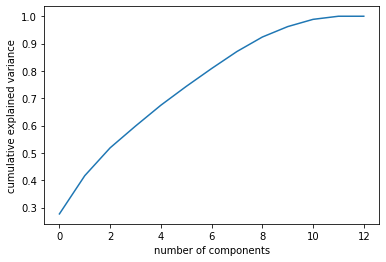

In [11]:
# Projecting the variance w.r.t the Principle Components
# graph a scree plot. In statistics, a scree plot expresses the variance associated with each principal component
pca = sklearnPCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

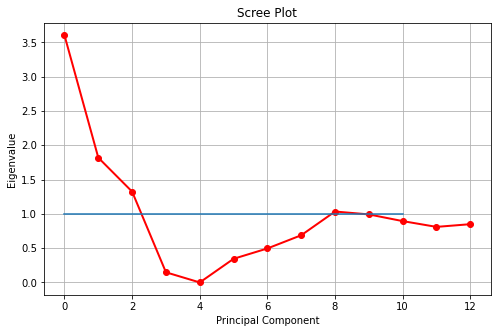

In [13]:
# how many principal components are preferred?
fig = plt.figure(figsize=(8,5))
sing_vals = range(fb.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.plot(range(0,11),np.ones(11))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [14]:
# Find out the eigenvector of the 5th component
eig_vecs[4] #fifth component

array([-0.24841236,  0.63368285, -0.0012514 ,  0.0374306 , -0.69542387,
        0.01271683,  0.04779739,  0.01892266,  0.09496604,  0.14375832,
        0.01515983,  0.09720844, -0.0977327 ])

In [15]:
# How much cumulative variance is explained by first four components?
tot = sum(eig_vals) # calculate the total value of eigen values
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] # looping to calculate variance explained %
cum_var_exp = np.cumsum(var_exp) # using numpy cumsum to create an array of cumsum of var_exp
cum_var_exp

array([ 27.70841089,  41.69793821,  51.88052217,  59.83465405,
        67.46380056,  74.34261908,  80.87652987,  87.10680678,
        92.39867276,  96.2103674 ,  98.86227405,  99.99999987,
       100.        ])

In [16]:
# What is explained variances for each of 4 components while performing PCA?
pca = sklearnPCA(n_components=4)
X_pca= pca.fit_transform(X_std)
pca.explained_variance_

array([3.60260442, 1.81889655, 1.32392371, 1.03418384])

In [17]:
# Which of the following is linear equation of third Principal component in terms of eigenvectors?
fb.columns

Index(['status_id', 'num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys',
       'status_link', 'status_photo', 'status_status'],
      dtype='object')

In [18]:
pca.components_[2]

array([-0.41243409,  0.01634395, -0.09707301,  0.0551709 ,  0.0012514 ,
        0.12163372,  0.2097203 ,  0.09521569, -0.08653039,  0.09425633,
       -0.2067786 ,  0.51556787, -0.65144429])

In [19]:
print('The Linear eq of 3rd component: ')
for i in range(0,fb.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[2][i],3),fb.columns[i]),end=' + ')

The Linear eq of 3rd component: 
-0.412 * status_id + 0.016 * num_reactions + -0.097 * num_comments + 0.055 * num_shares + 0.001 * num_likes + 0.122 * num_loves + 0.21 * num_wows + 0.095 * num_hahas + -0.087 * num_sads + 0.094 * num_angrys + -0.207 * status_link + 0.516 * status_photo + -0.651 * status_status + 